# Import data

In [1]:
import os
import pandas as pd
import collections
import seaborn as sns
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [2]:
def importRawData(dir):
    # Import all the data from a directory
    # dir: directory with the data
    # return: a dictionary of dataframes
    dict = {}

    for file in os.listdir(dir):
        if file.endswith('.json'):
            df = pd.read_json(f'{dir}/' + file, lines=True)
            dict[file.removesuffix(".json")] = df

    return dict

raw_data = importRawData('datasets/submissions')

In [3]:
def importPreparedData(path, type="csv"):
    # Import the csv files
    # path: path to the csv files
    # return: dictionary of dataframes for each challenge and each predicate

    allDfs = {} # Dictionary of dataframes for each challenge and each predicate

    # Iterate over the folders
    for folder in os.listdir(path):
        # Iterate over the csv files
        for file in os.listdir(path + folder):
            # Read the file
            if type == "csv":
                df = pd.read_csv(path + folder + "/" + file)
            elif type == "json":
                df = pd.read_json(path + folder + "/" + file, lines=True)
            else:
                print("Error: unknown file type")
                return
            # Add the dataframe to the dictionary
            if folder not in allDfs:
                allDfs[folder] = {}
            cmd = re.sub("\..*", "", file)
            allDfs[folder][cmd] = df
            
        

    return allDfs

# Import the csv files
allDfs = importPreparedData("./all/")
trainDfs = importPreparedData("./train/")
testDfs = importPreparedData("./test/", "json")

# Data analysis

Count number of submissions, correct and incorrect. 

In [4]:
def analyzeRawData(raw_data):
    analysisDf = pd.DataFrame({"Challenge": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, df in raw_data.items():
        count = df["sat"].value_counts().to_dict()
        counter.update(count)
        # Update counter
        analysisDf.loc[len(analysisDf)] = [
            challenge,
            len(df),
            len(df[df["sat"] == 0.0]),
            len(df[df["sat"] == 1.0])
        ]

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["#0071bc", "#258433", "#a3281d"])
    plt.ylabel("Number of Entries") 
    plt.xlabel("Sat value")

    return analysisDf

def analyzePreparedData(allDfs):
    analysisDf = pd.DataFrame({"Challenge": [], "Predicate": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, cmdDfs in allDfs.items():
        for cmd, df in cmdDfs.items():
        # Update counter
            count = df["sat"].value_counts().to_dict()
            counter.update(count)
            analysisDf.loc[len(analysisDf)] = [
                challenge,
                cmd,
                len(df),
                len(df[df["sat"] == 0.0]),
                len(df[df["sat"] == 1.0])
            ]

    # Sort by number of submissions
    analysisDf = analysisDf.sort_values(by=['NumSubmissions'], ascending=False)

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["green", "red"])
    plt.ylabel("Number of Submissions")

    return analysisDf

## Analyze Raw Data

Check data types.

In [5]:
print(raw_data["9jPK8KBWzjFmBx4Hb"].dtypes)

_id              object
time             object
code             object
derivationOf     object
theme            object
original         object
cmd_i           float64
cmd_c           float64
cmd_n            object
sat             float64
msg              object
dtype: object


Analyze number of entries.

Total number of submissions: 35224
Total number of correct submissions: 10537
Total number of incorrect submissions: 14714


,Challenge,NumSubmissions,NumCorrect,NumIncorrect
0,9jPK8KBWzjFmBx4Hb,5279,1440,2912
1,FwCGymHmbqcziisH5,1263,185,796
2,gAeD3MTGCCv8YNTaK,3111,1004,1390
3,JC8Tij8o8GZb99gEJ,1175,151,683
4,jyS8Bmceejj9pLbTW,840,233,344
5,PQAJE67kz8w5NWJuM,4189,1600,1328
6,sDLK7uBCbgZon3znd,3904,1776,790
7,WGdhwKZnCu7aKhXq9,393,64,219
8,YH3ANm7Y5Qe5dSYem,5630,1788,2390
9,zoEADeCW2b2suJB2k,3225,588,1406


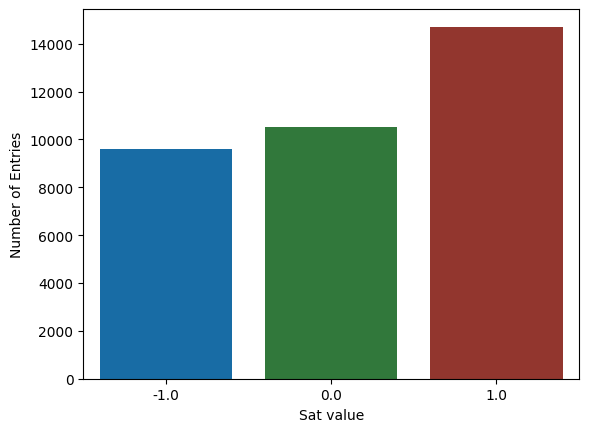

In [6]:
analyzeRawData(raw_data)

## Analyze All data

Total number of submissions: 23981
Total number of correct submissions: 10515
Total number of incorrect submissions: 13466


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
80,YH3ANm7Y5Qe5dSYem,inv11,597,78,519
83,YH3ANm7Y5Qe5dSYem,inv14,540,57,483
45,gAeD3MTGCCv8YNTaK,weaklyConnected,528,76,452
96,zoEADeCW2b2suJB2k,inv4,437,36,401
15,9jPK8KBWzjFmBx4Hb,prop5,424,65,359
81,YH3ANm7Y5Qe5dSYem,inv12,420,61,359
44,gAeD3MTGCCv8YNTaK,undirected,412,209,203
3,9jPK8KBWzjFmBx4Hb,prop12,409,37,372
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267
102,zRAn69AocpkmxXZnW,inv11,378,83,295


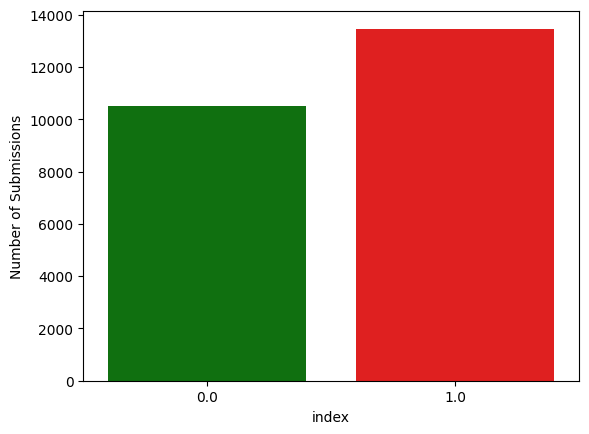

In [7]:
analyzePreparedData(allDfs)

## Analyze train data

Total number of submissions: 20978
Total number of correct submissions: 9211
Total number of incorrect submissions: 11767


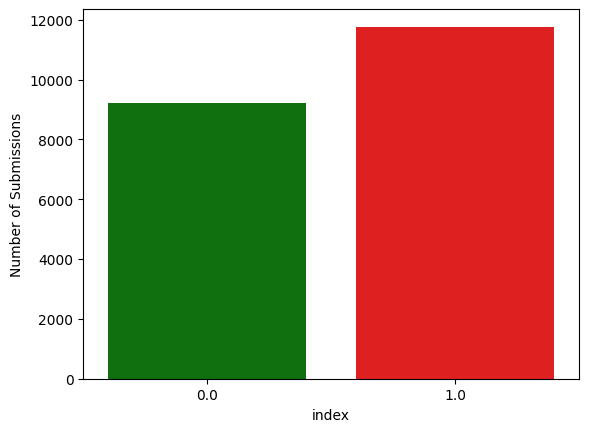

In [8]:
df = analyzePreparedData(trainDfs)

## Analyze test data

Total number of submissions: 1323
Total number of correct submissions: 0
Total number of incorrect submissions: 1323


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
44,YH3ANm7Y5Qe5dSYem,inv14,91,0,91
56,zoEADeCW2b2suJB2k,inv4,80,0,80
66,zRAn69AocpkmxXZnW,inv15,77,0,77
28,PQAJE67kz8w5NWJuM,inv7,57,0,57
11,gAeD3MTGCCv8YNTaK,undirected,53,0,53
16,JC8Tij8o8GZb99gEJ,Inv4,53,0,53
45,YH3ANm7Y5Qe5dSYem,inv15,51,0,51
12,gAeD3MTGCCv8YNTaK,weaklyConnected,48,0,48
41,YH3ANm7Y5Qe5dSYem,inv11,47,0,47
27,PQAJE67kz8w5NWJuM,inv6,45,0,45


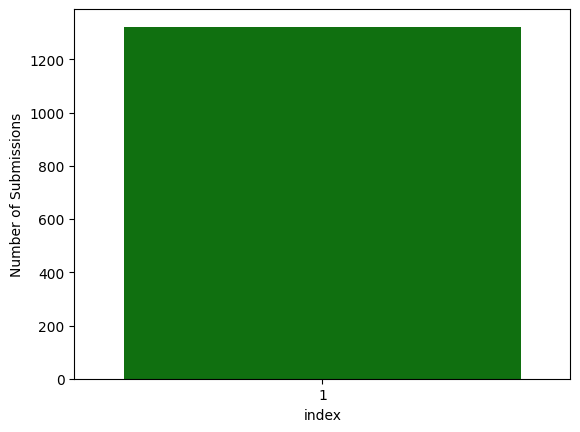

In [9]:
analyzePreparedData(testDfs)

# Graph Analysis

In [10]:
def importGraphAnalytics(path):
    return pd.read_csv(path)

def analyzeGraphAnalytics(df):
    total_submissions = 0
    total_correct = 0
    total_incorrect = 0
    total_edges = 0

    for index, row in df.iterrows():
        total_submissions += row["NumSubmissions"]
        total_correct += row["NumCorrect"]
        total_incorrect += row["NumIncorrect"]
        total_edges += row["NumEdges"]

    print("Total number of submissions: " + str(total_submissions))
    print("Total number of correct submissions: " + str(total_correct))
    print("Total number of incorrect submissions: " + str(total_incorrect))
    print("Total number of edges: " + str(total_edges))

PATH = "./evaluation/"

In [11]:
df = importGraphAnalytics(PATH + "graph_statistics.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 7745
Total number of correct submissions: 991
Total number of incorrect submissions: 6754
Total number of edges: 11832


In [12]:
df

,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumEdges
0,jyS8Bmceejj9pLbTW,Inv1,30,7,23,48
1,jyS8Bmceejj9pLbTW,Inv2,55,7,48,75
2,jyS8Bmceejj9pLbTW,Inv3,40,15,25,50
3,jyS8Bmceejj9pLbTW,Inv4,91,16,75,112
4,PQAJE67kz8w5NWJuM,inv1,24,14,10,43
5,PQAJE67kz8w5NWJuM,inv2,20,5,15,38
6,PQAJE67kz8w5NWJuM,inv3,27,6,21,42
7,PQAJE67kz8w5NWJuM,inv4,39,13,26,68
8,PQAJE67kz8w5NWJuM,inv5,75,9,66,143
9,PQAJE67kz8w5NWJuM,inv6,59,11,48,112


# Hint Analysis

## APTED Mapping
- Creates new paths when TED too long;
- Uses APTED;
- Uses TED for the cost function;

Import data.

In [13]:
apted_df = pd.read_json(PATH + "apted_hint_stats.json", lines=True)
total_hints = len(apted_df)
apted_df[["expression", "targetExpr", "hint", "operations", "challenge", "predicate"]].head(10)

,expression,targetExpr,hint,operations,challenge,predicate
0,no File,no (Trash+Protected),"Near a solution! Missing ""+"".Try adding it inside of ""no"".","[""(type='Insert', node=+, parent=no, position=0)"", ""(type='Update', node=File, value=Protected)"", ""(type='Move', tree='{File}', parent=+, position=0)"", ""(type='Insert', node=Trash, parent=+, position=1)""]",9jPK8KBWzjFmBx4Hb,prop1
1,no File no Protected,no Trash no Protected,"One step away from the solution! Try changing ""File"" to ""Trash"".","[""(type='Update', node=File, value=Trash)""]",9jPK8KBWzjFmBx4Hb,prop1
2,eventually (always some f:File | f not in Trash implies f in Trash'),eventually (some f:File | f in Trash and always f in Trash),"Keep going! Missing ""always"".Try adding it inside of ""=>"".","[""(type='Move', tree='{some{one of{var0}{File}}{=>{!in{var0/File}{Trash}}{in{var0/File}{'{Trash}}}}}', parent=eventually, position=0)"", ""(type='Update', node==>, value=AND)"", ""(type='Insert', node=always, parent==>, position=0)"", ""(type='Update', node=!in, value=in)"", ""(type='Move', tree='{!in{var0/File}{Trash}}', parent=always, position=0)"", ""(type='Move', tree='{Trash}', parent=in, position=1)"", ""(type='Delete', node=')"", ""(type='Delete', node=always)""]",9jPK8KBWzjFmBx4Hb,prop12
3,always (all f:File | f in Trash since (f not in Protected) ),always all f : Trash | f in Trash since f not in Protected,"One step away from the solution! Try changing ""File"" to ""Trash"".","[""(type='Update', node=File, value=Trash)""]",9jPK8KBWzjFmBx4Hb,prop20
4,some Trash,eventually some Trash,"One step away from the solution! Missing ""eventually"".","[""(type='Insert', node=eventually, parent=root, position=0)"", ""(type='Move', tree='{some{Trash}}', parent=eventually, position=0)""]",9jPK8KBWzjFmBx4Hb,prop4
5,some f : File | eventually (f not in File),eventually some f: File | eventually f not in File,"One step away from the solution! Missing ""eventually"".","[""(type='Insert', node=eventually, parent=root, position=0)"", ""(type='Move', tree='{some{one of{var0}{File}}{eventually{!in{var0/File}{File}}}}', parent=eventually, position=0)""]",9jPK8KBWzjFmBx4Hb,prop5
6,iden not in ^adj,no iden & ^adj,"Keep going! Missing ""no"".","[""(type='Insert', node=no, parent=root, position=0)"", ""(type='Update', node=!in, value=&)"", ""(type='Move', tree='{!in{iden}{^{field/adj{set of{Node}}}}}', parent=no, position=0)"", ""(type='Insert', node=iden, parent=!in, position=2)"", ""(type='Delete', node=iden)""]",gAeD3MTGCCv8YNTaK,acyclic
7,no p: Node | p in p.~adj,no n:Node | n in n.^adj,"One step away from the solution! Try changing ""~"" to ""^"".","[""(type='Update', node=~, value=^)""]",gAeD3MTGCCv8YNTaK,acyclic
8,all n:Node | n not in n.adj,all n : Node | n not in n.(^adj),"One step away from the solution! Missing ""^"".Try adding it inside of ""."".","[""(type='Insert', node=^, parent=., position=1)"", ""(type='Move', tree='{field/adj{set of{Node}}}', parent=^, position=0)""]",gAeD3MTGCCv8YNTaK,acyclic
9,all x: Node | x not in x.adj,all n : Node | n not in n.(^adj),"One step away from the solution! Missing ""^"".Try adding it inside of ""."".","[""(type='Insert', node=^, parent=., position=1)"", ""(type='Move', tree='{field/adj{set of{Node}}}', parent=^, position=0)""]",gAeD3MTGCCv8YNTaK,acyclic


Analyze distances.

In [14]:
longer_paths = df[df["srcDstTED"] < df["totalTED"]]
equal_paths = df[df["srcDstTED"] == df["totalTED"]]
num_longer_paths = len(longer_paths)
num_equal_paths = len(equal_paths)

print("Total number of hints: " + str(total_hints))
print("Number of hints with longer paths: " + str(num_longer_paths) + " (" + str(round(num_longer_paths / total_hints * 100, 2)) + "%)")
print("Number of hints with equal paths: " + str(num_equal_paths) + " (" + str(round(num_equal_paths / total_hints * 100, 2)) + "%)")

KeyError: 'srcDstTED'

Analyze number of new nodes in the graph.

In [ ]:
count = apted_df["isNewNode"].value_counts()
count

True     1004
False     319
Name: isNewNode, dtype: int64

In [ ]:
print("Total number of hints: " + str(total_hints))
print("Number of old submissions: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of new submissions: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

Total number of hints: 1323
Number of old submissions: 319 (24.11%)
Number of new submissions: 1004 (75.89%)


## GumTree Mapping
- Creates new paths when TED too long;
- Uses GumTree;
- Uses TED for the cost function;

Import data.

In [ ]:
gumtree_df = pd.read_json(PATH + "gumtree_hint_stats.json", lines=True)

Compare number of operations generated.

In [ ]:
# Merge the two dataframes
merge_df = pd.merge(apted_df, gumtree_df, on=["challenge", "predicate", "expression", "code"], suffixes=("_a", "_g"))
merge_df.drop(["challenge", "predicate", "code", "type_a", "type_g"], inplace=True, axis=1)
total_hints = len(merge_df)

# Add columns counting number of operations
merge_df["nOps_a"] = merge_df["operations_a"].apply(lambda x: len(x[1:-1].split(")\", \"")))
merge_df["nOps_g"] = merge_df["operations_g"].apply(lambda x: len(x[1:-1].split(")\", \"")))

# Count number of hints with lower, higher and equal number of operations
lower = merge_df[merge_df["nOps_a"] < merge_df["nOps_g"]]
num_lower = len(lower)
higher = merge_df[merge_df["nOps_a"] > merge_df["nOps_g"]]
num_higher = len(higher)
equal = merge_df[merge_df["nOps_a"] == merge_df["nOps_g"]]
num_equal = len(equal)

print("Total number of hints: " + str(total_hints))
print("APTED lower number of operations: " + str(num_lower) + " (" + str(round(num_lower / total_hints * 100, 2)) + "%)")
print("GumTree lower number of operations: " + str(num_higher) + " (" + str(round(num_higher / total_hints * 100, 2)) + "%)")
print("Equal number of operations: " + str(num_equal) + " (" + str(round(num_equal / total_hints * 100, 2)) + "%)")

Total number of hints: 1323
APTED lower number of operations: 388 (29.33%)
GumTree lower number of operations: 267 (20.18%)
Equal number of operations: 668 (50.49%)


Compare time it takes.

In [ ]:
# count number of hints with lower, higher and equal time
lower = merge_df[merge_df["time_a"] < merge_df["time_g"]]
num_lower = len(lower)
higher = merge_df[merge_df["time_a"] > merge_df["time_g"]]
num_higher = len(higher)
equal = merge_df[merge_df["time_a"] == merge_df["time_g"]]
num_equal = len(equal)

print("Total number of hints: " + str(total_hints))
print("APTED lower time: " + str(num_lower) + " (" + str(round(num_lower / total_hints * 100, 2)) + "%)")
print("GumTree lower time: " + str(num_higher) + " (" + str(round(num_higher / total_hints * 100, 2)) + "%)")
print("Equal time: " + str(num_equal) + " (" + str(round(num_equal / total_hints * 100, 2)) + "%)")


Total number of hints: 1323
APTED lower time: 818 (61.83%)
GumTree lower time: 282 (21.32%)
Equal time: 223 (16.86%)
